In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
data = pd.read_csv("raw_data/airline_passengers.csv", index_col="Month", parse_dates=True)
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


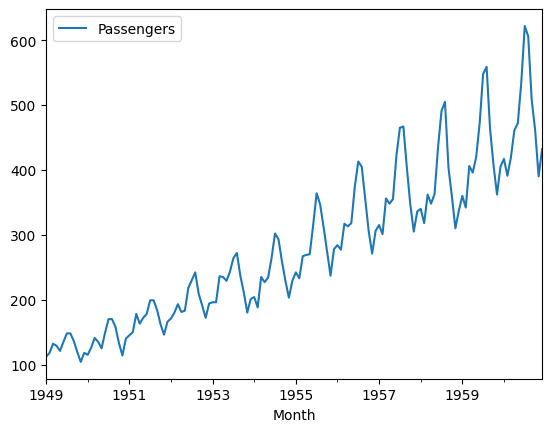

In [125]:
data.plot();

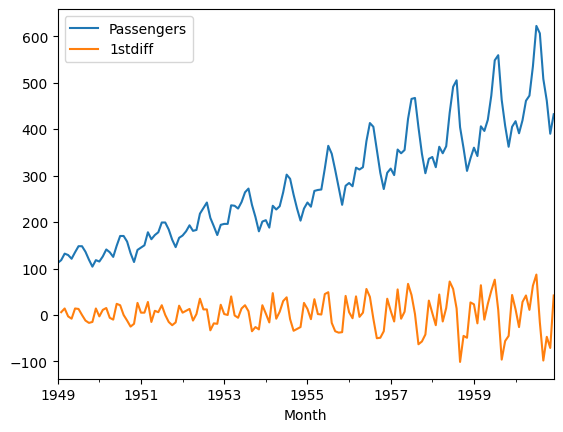

In [126]:
data["1stdiff"] = data["Passengers"].diff()
data.plot();

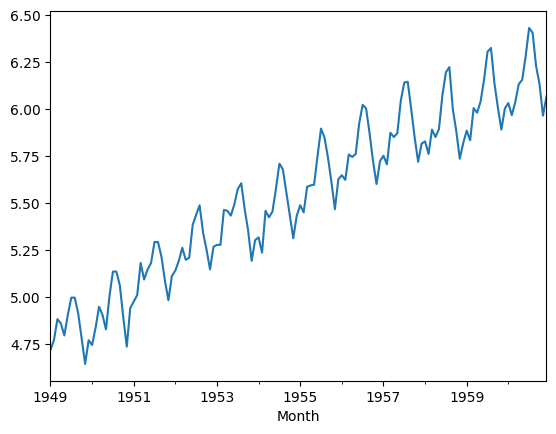

In [127]:
data["LogPassengers"] = np.log(data["Passengers"])
data["LogPassengers"].plot();

In [128]:
from statsmodels.tsa.arima.model import ARIMA

In [129]:
data.index.freq = "MS"

In [130]:
Ntest = 12
train = data.iloc[:-Ntest]
test = data.iloc[-Ntest:]

In [131]:
train_idx = data.index <= train.index[-1]
test_idx = data.index > train.index[-1]

In [132]:
arima = ARIMA(train["Passengers"], order=(1, 0, 0))
arima_result = arima.fit()

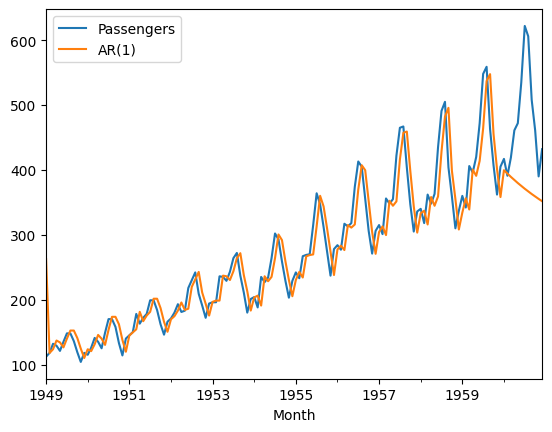

In [133]:
data.loc[train_idx, "AR(1)"] = arima_result.predict(start=train.index[0], end=train.index[-1])
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
data.loc[test_idx, "AR(1)"] = forecast
data[["Passengers", "AR(1)"]].plot();

In [134]:
type(prediction_result)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [135]:
prediction_result.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829379
1960-04-01,269.338256,499.534230
1960-05-01,253.432284,506.121347
1960-06-01,239.373402,511.217437
1960-07-01,226.768868,515.201638
1960-08-01,215.354570,518.324977
1960-09-01,204.941150,520.764224
1960-10-01,195.386337,522.649550


In [136]:
def plot_fit_and_forecast(result):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(data["Passengers"], label="data")

    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color="green", label="fitted")

    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int["lower Passengers"], conf_int["upper Passengers"]
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label="forecast")
    ax.fill_between(test.index,
                    lower, upper,
                    color="red", alpha=0.3)
    ax.legend()

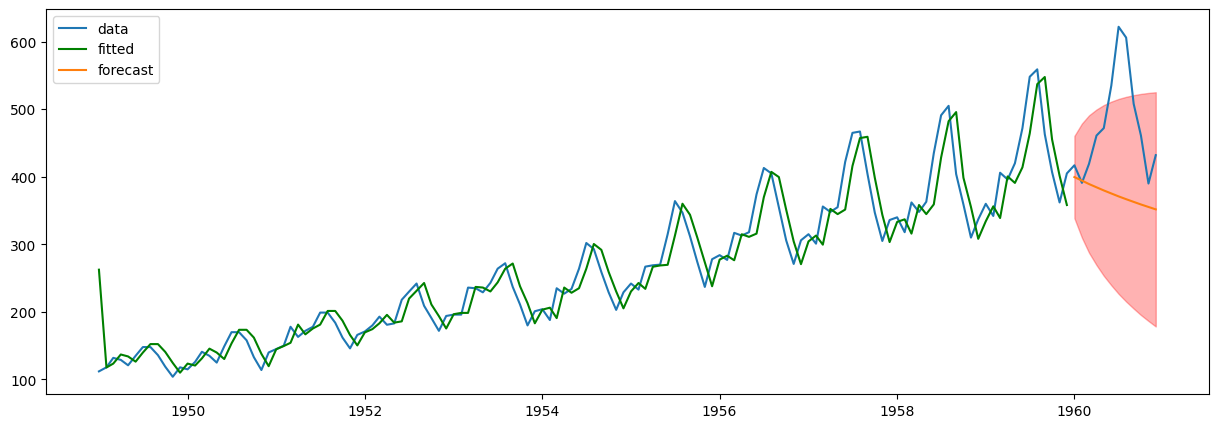

In [137]:
plot_fit_and_forecast(arima_result)

c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


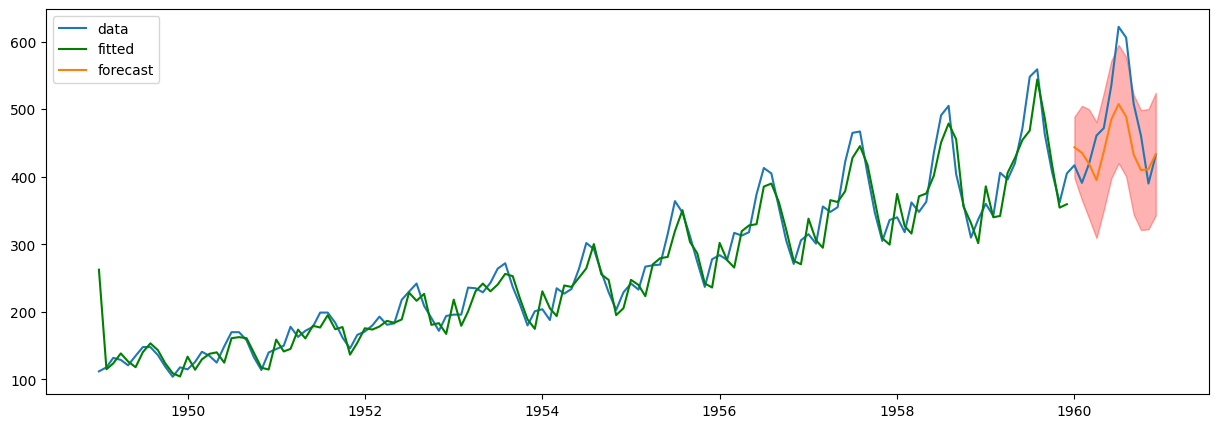

In [138]:
arima = ARIMA(train["Passengers"], order=(10, 0, 0)) # AR
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


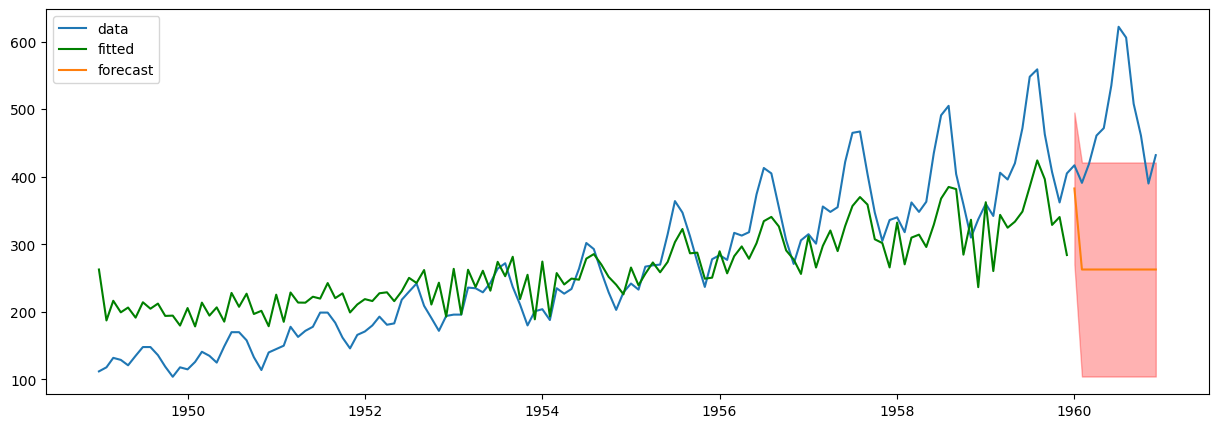

In [139]:
arima = ARIMA(train["Passengers"], order=(0, 0, 1)) # MA
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

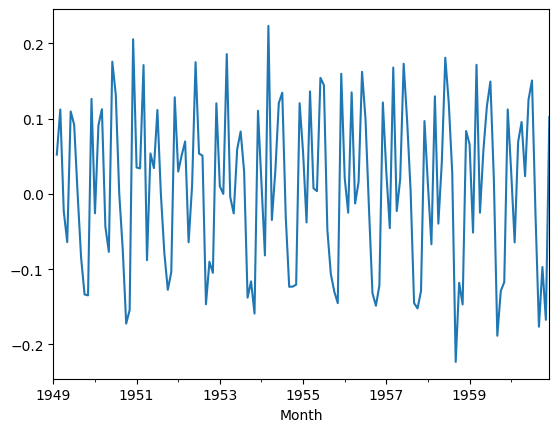

In [140]:
data["Log1stDiff"] = data["LogPassengers"].diff()
data["Log1stDiff"].plot();

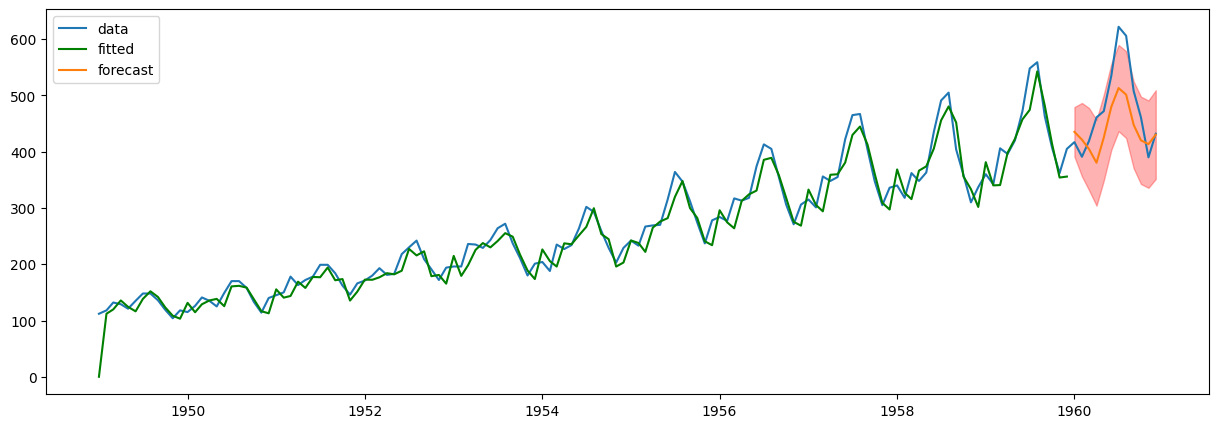

In [141]:
arima = ARIMA(train["Passengers"], order=(8, 1, 1))
arima_result_811 = arima.fit()

plot_fit_and_forecast(arima_result_811)

In [142]:
def plot_fit_and_forecast_int(result, d, col="Passengers"):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(data[col], label="data")

    train_pred = result.predict(start=train.index[d], end=train.index[-1])
    
    ax.plot(train.index[d:], train_pred, color="green", label="fitted")

    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int[f"lower {col}"], conf_int[f"upper {col}"]
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label="forecast")
    ax.fill_between(test.index, lower, upper, color="red", alpha=0.3)
    ax.legend()

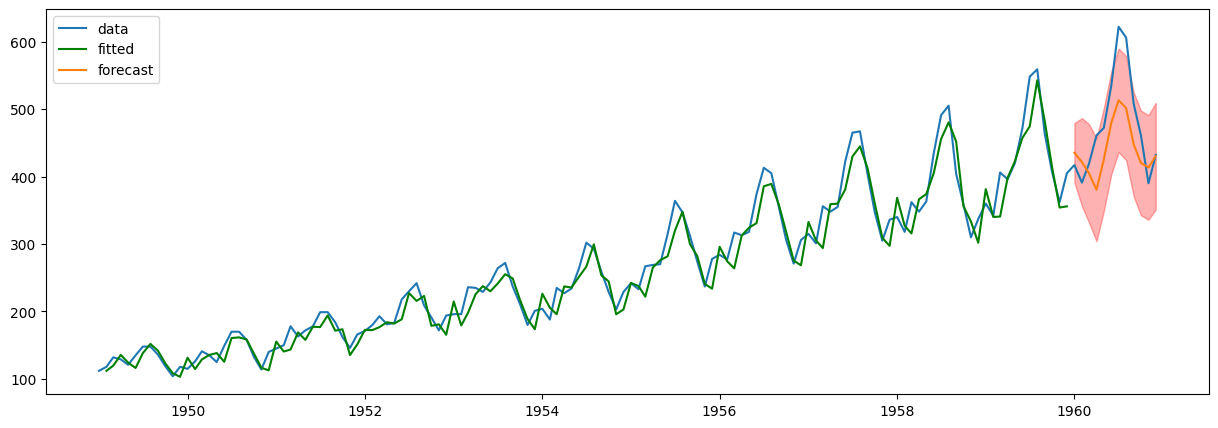

In [143]:
arima = ARIMA(train["Passengers"], order=(8, 1, 1))
arima_result_811 = arima.fit()

plot_fit_and_forecast_int(arima_result_811, 1)

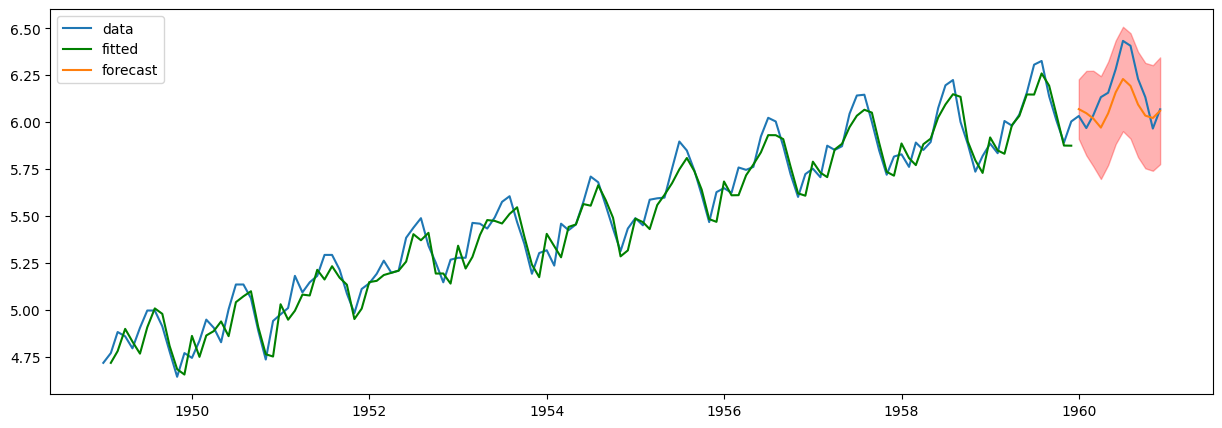

In [144]:
arima = ARIMA(train["LogPassengers"], order=(8, 1, 1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col="LogPassengers")

c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


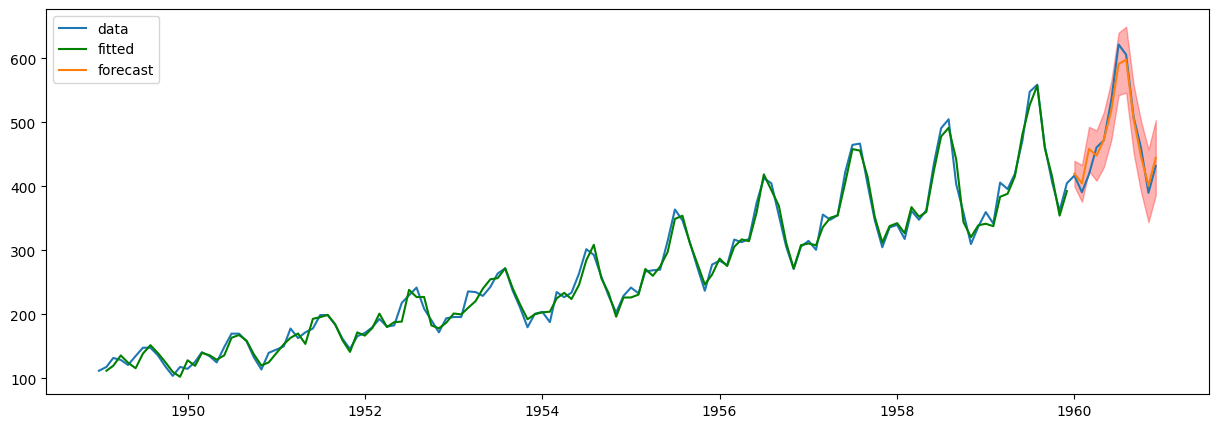

In [145]:
arima = ARIMA(train["Passengers"], order=(12, 1, 0))
arima_result_1210 = arima.fit()

plot_fit_and_forecast_int(arima_result_1210, 1)

c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


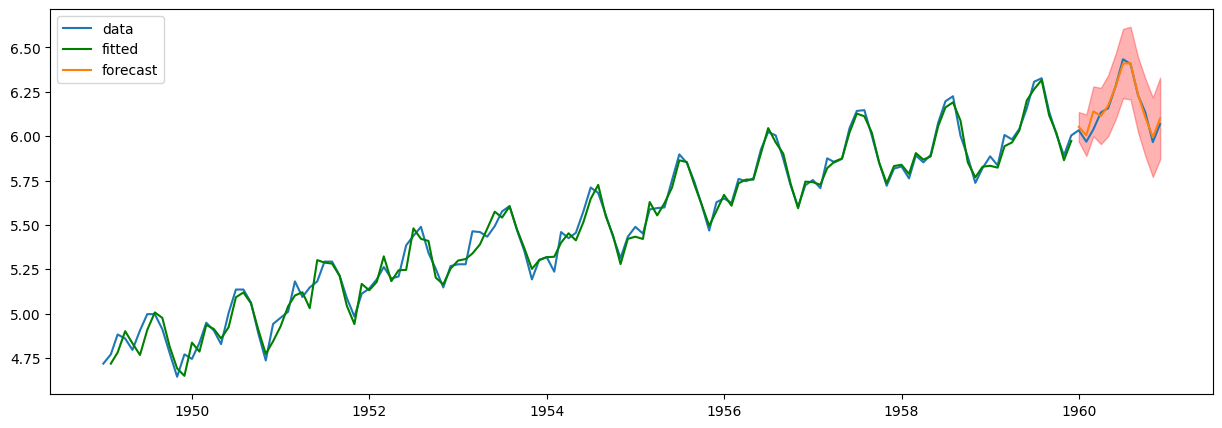

In [146]:
arima = ARIMA(train["LogPassengers"], order=(12, 1, 0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col="LogPassengers")

In [147]:
def rmse(result, is_logged):
    forecast = result.forecast(Ntest)
    if is_logged:
        forecast = np.exp(forecast)

    t = test["Passengers"]
    y = forecast
    return np.sqrt(np.mean((t-y)**2))

In [148]:
print(f"ARIMA(8,1,1): {rmse(arima_result_811, False)}")
print(f"ARIMA(8,1,1) logged: {rmse(arima_result_log811, True)}")
print(f"ARIMA(12,1,0): {rmse(arima_result_1210, False)}")
print(f"ARIMA(12,1,0) logged: {rmse(arima_result_log1210, True)}")

ARIMA(8,1,1): 59.0645895557893
ARIMA(8,1,1) logged: 61.59831706658763
ARIMA(12,1,0): 17.492484848300677
ARIMA(12,1,0) logged: 16.118833518620665


In [149]:
arima_result_1210.get_forecast(Ntest).predicted_mean, arima_result_1210.forecast(Ntest)

(1960-01-01    420.017917
 1960-02-01    404.799605
 1960-03-01    458.645879
 1960-04-01    448.256085
 1960-05-01    472.937533
 1960-06-01    518.971171
 1960-07-01    591.478865
 1960-08-01    598.099300
 1960-09-01    505.118152
 1960-10-01    447.327928
 1960-11-01    401.037350
 1960-12-01    445.011054
 Freq: MS, Name: predicted_mean, dtype: float64,
 1960-01-01    420.017917
 1960-02-01    404.799605
 1960-03-01    458.645879
 1960-04-01    448.256085
 1960-05-01    472.937533
 1960-06-01    518.971171
 1960-07-01    591.478865
 1960-08-01    598.099300
 1960-09-01    505.118152
 1960-10-01    447.327928
 1960-11-01    401.037350
 1960-12-01    445.011054
 Freq: MS, Name: predicted_mean, dtype: float64)

## Stationarity

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

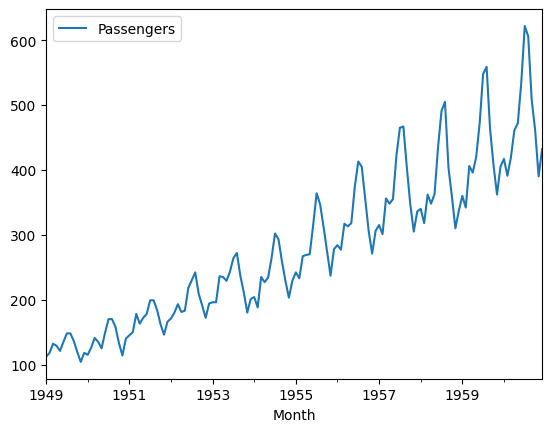

In [151]:
data = pd.read_csv("raw_data/airline_passengers.csv", index_col="Month", parse_dates=True)
data.plot();

In [152]:
adfuller(data["Passengers"])

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [153]:
def adf(x):
    res = adfuller(x)
    print("Test-Statistic: ", res[0])
    print("P-values: ", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [154]:
adf(data["Passengers"])

Test-Statistic:  0.8153688792060482
P-values:  0.991880243437641
Non-Stationary


In [155]:
adf(np.random.randn(100))

Test-Statistic:  -5.601071585611846
P-values:  1.2644286934284734e-06
Stationary


In [156]:
adf(np.random.gamma(1, 1, 100))

Test-Statistic:  -9.787995297016808
P-values:  6.46588711323733e-17
Stationary


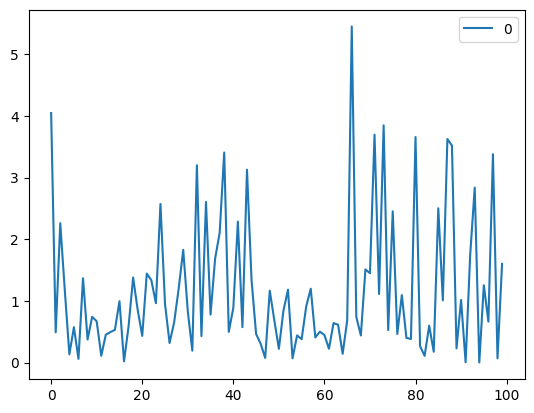

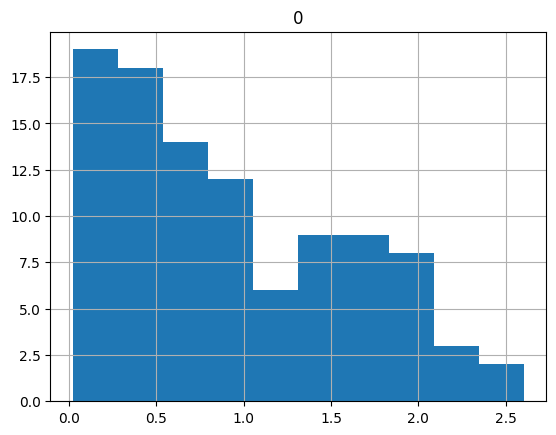

In [157]:
pd.DataFrame(np.random.gamma(1, 1, 100)).plot();
pd.DataFrame(np.random.gamma(1, 1, 100)).hist();

In [158]:
data["LogPassengers"] = np.log(data["Passengers"])

In [159]:
adf(data["LogPassengers"])

Test-Statistic:  -1.7170170891069607
P-values:  0.42236677477039125
Non-Stationary


In [160]:
data["diff"] = data["Passengers"].diff()

<Axes: xlabel='Month'>

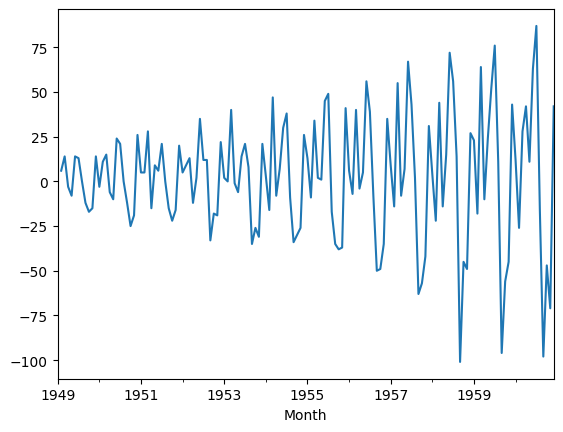

In [161]:
data["diff"].plot()

In [162]:
adf(data["diff"].dropna())

Test-Statistic:  -2.8292668241699994
P-values:  0.0542132902838255
Non-Stationary


In [163]:
data["difflog"] = data["LogPassengers"].diff()

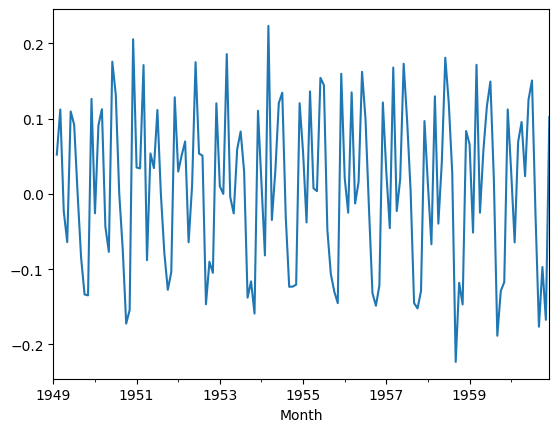

In [164]:
data["difflog"].plot();

In [165]:
adf(data["difflog"].dropna())

Test-Statistic:  -2.717130598388133
P-values:  0.07112054815085875
Non-Stationary


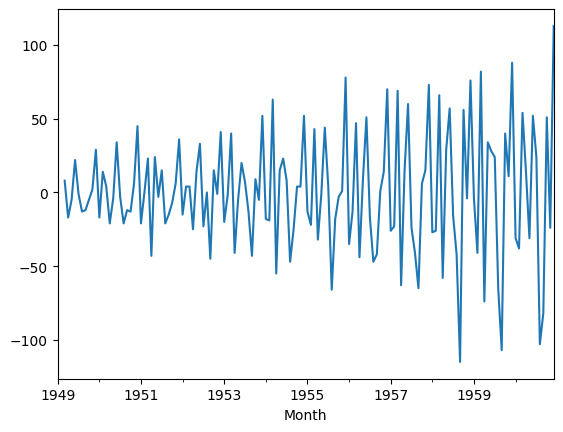

In [166]:
data["diff-diff"] = data["diff"].diff()
data["diff-diff"].plot();

In [167]:
adf(data["diff-diff"].dropna())

Test-Statistic:  -16.384231542468505
P-values:  2.7328918500142407e-29
Stationary


In [168]:
!curl -o raw_data/sp500sub.csv https://lazyprogrammer.me/course_files/sp500sub.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0 24.2M    0  238k    0     0  67409      0  0:06:17  0:00:03  0:06:14 67472
  2 24.2M    2  670k    0     0   125k      0  0:03:17  0:00:05  0:03:12  126k
  3 24.2M    3  798k    0     0   142k      0  0:02:54  0:00:05  0:02:49  184k
  6 24.2M    6 1518k    0     0   230k      0  0:01:47  0:00:06  0:01:41  327k
 11 24.2M   11 2894k    0     0   382k      0  0:01:05  0:00:07  0:00:58  626k
 18 24.2M   18 4478k    0     0   522k      0  0:00:47  0:00:08  0:00:39  855k
 21 24.2M   21 5262k    0     0   549k      0  0:00

In [169]:
data2 = pd.read_csv("raw_data/sp500sub.csv", index_col="Date", parse_dates = True)

In [170]:
data2

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.220000,9.510000,9.170000,9.500000,9.500000,1865400.0,INCY
2010-01-05,9.510000,10.290000,9.450000,10.270000,10.270000,7608900.0,INCY
2010-01-06,10.380000,11.090000,10.350000,11.000000,11.000000,8046700.0,INCY
2010-01-07,11.000000,11.060000,10.620000,10.820000,10.820000,3680300.0,INCY
2010-01-08,10.820000,11.000000,10.750000,10.940000,10.940000,1529300.0,INCY
...,...,...,...,...,...,...,...
2018-12-21,41.000000,41.900002,40.369999,40.680000,39.367714,17481400.0,MDLZ
2018-12-24,40.720001,40.849998,39.200001,39.480000,38.206425,6641300.0,MDLZ
2018-12-26,39.619999,40.029999,38.779999,40.000000,38.709652,8640100.0,MDLZ


In [171]:
goog = data2[data2["Name"] == "GOOG"][["Close"]]
goog

,Close
Date,
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
2010-01-08,299.885956
...,...
2018-12-21,979.539978
2018-12-24,976.219971
2018-12-26,1039.459961


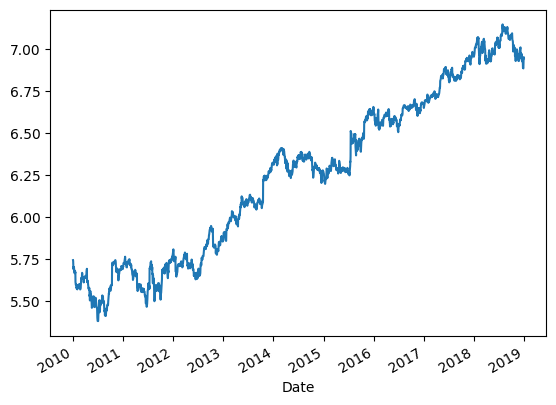

In [172]:
goog["LogPrice"] = np.log(goog["Close"])
goog["LogRet"] = goog["LogPrice"].diff()
goog["LogPrice"].plot();

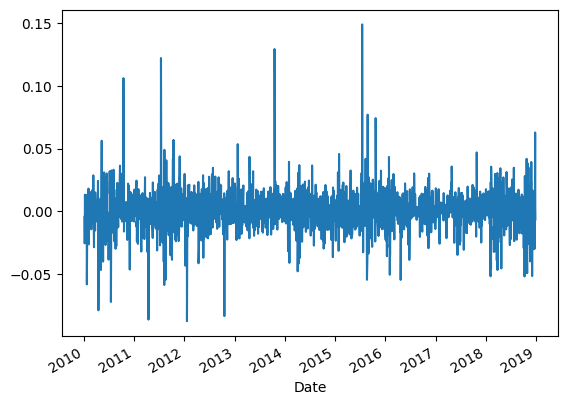

In [173]:
goog["LogRet"].plot();


In [174]:
adf(goog["LogPrice"])
adf(goog["LogRet"].dropna())

Test-Statistic:  -0.4181902578906113
P-values:  0.907017067749841
Non-Stationary
Test-Statistic:  -46.66748022773676
P-values:  0.0
Stationary


## PACF and ACF

In [175]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import numpy as np
import matplotlib.pyplot as plt

In [176]:
x0 = np.random.randn(1000)

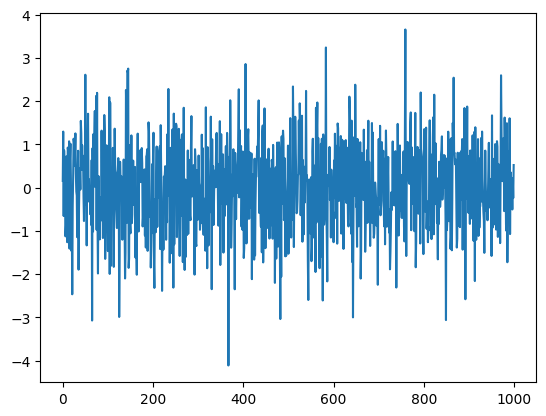

In [177]:
plt.plot(x0)

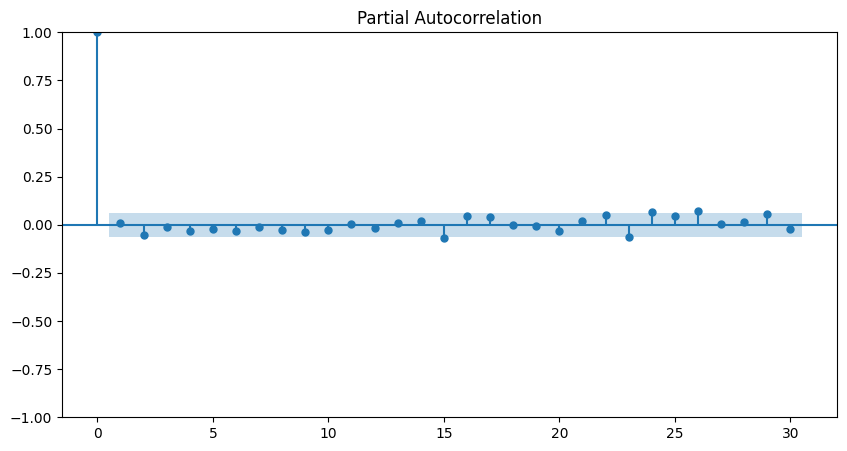

In [178]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x0, ax=ax);

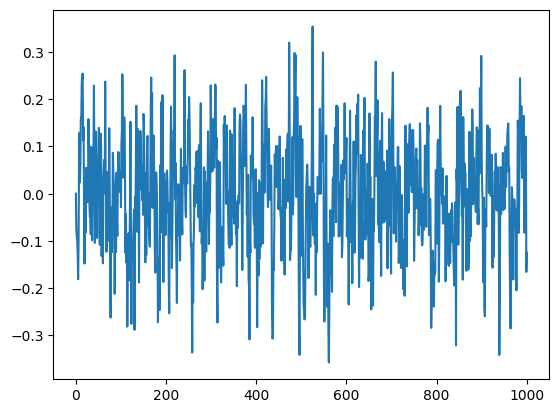

In [179]:
x1 = [0]
for i in range(1000):
    x = 0.5 * x1[-1] + 0.1 * np.random.randn()
    x1.append(x)

x1 = np.array(x1)
plt.plot(x1);

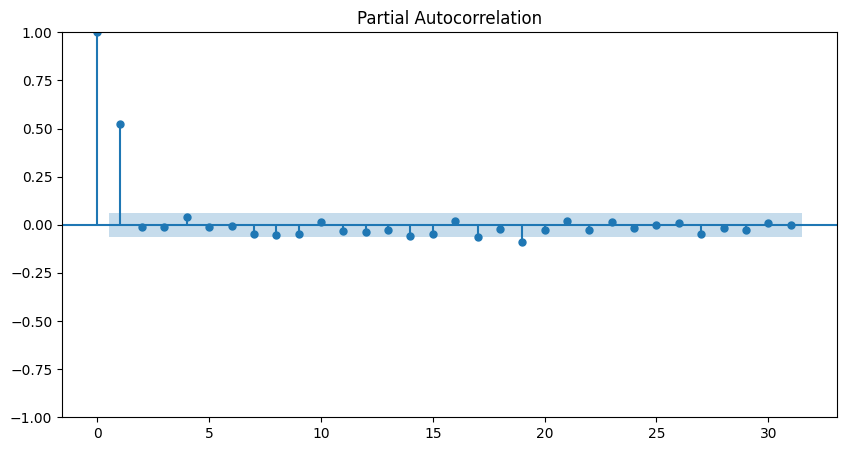

In [180]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x1, ax=ax);

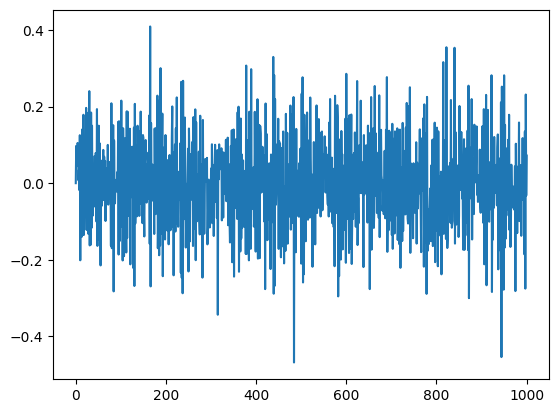

In [181]:
x1 = [0]
for i in range(1000):
    x = -0.5 * x1[-1] + 0.1 * np.random.randn()
    x1.append(x)
x1 = np.array(x1)
plt.plot(x1);

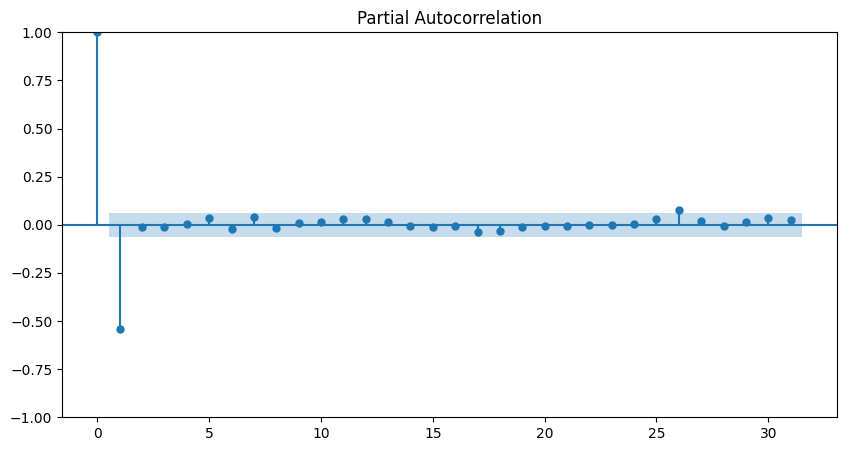

In [182]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x1, ax=ax);

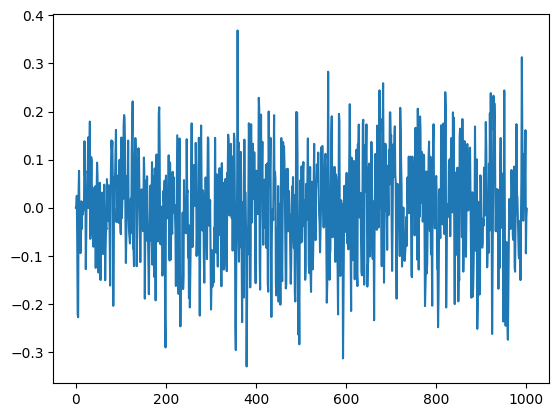

In [183]:
x2 = [0, 0]
for i in range(1000):
    x = 0.5 * x2[-1] - 0.3 * x2[-2] + 0.1 * np.random.randn()
    x2.append(x)
x2 = np.array(x2)
plt.plot(x2);

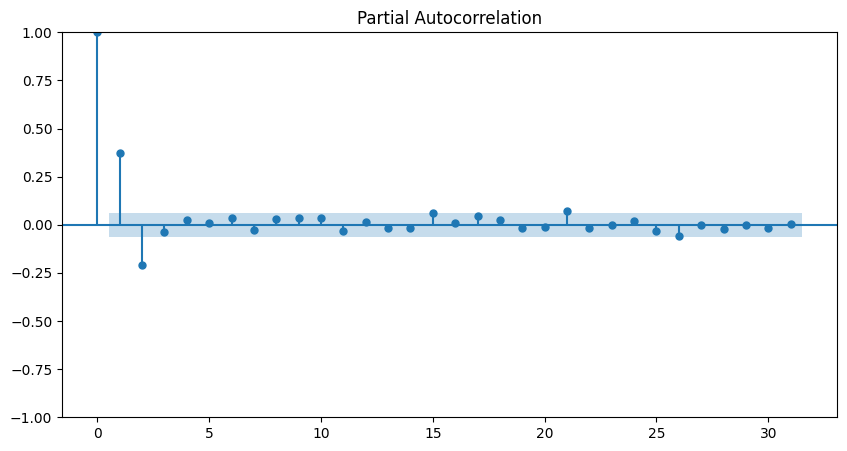

In [184]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x2, ax=ax);

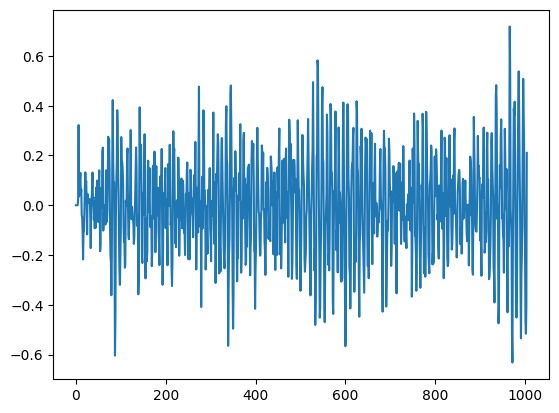

In [185]:
x5 = [0, 0, 0, 0, 0]
for i in range(1000):
    x = 0.5 * x5[-1] - 0.3 * x5[-2] - 0.6 * x5[-5] + 0.1 * np.random.randn()
    x5.append(x)
x5 = np.array(x5)
plt.plot(x5);

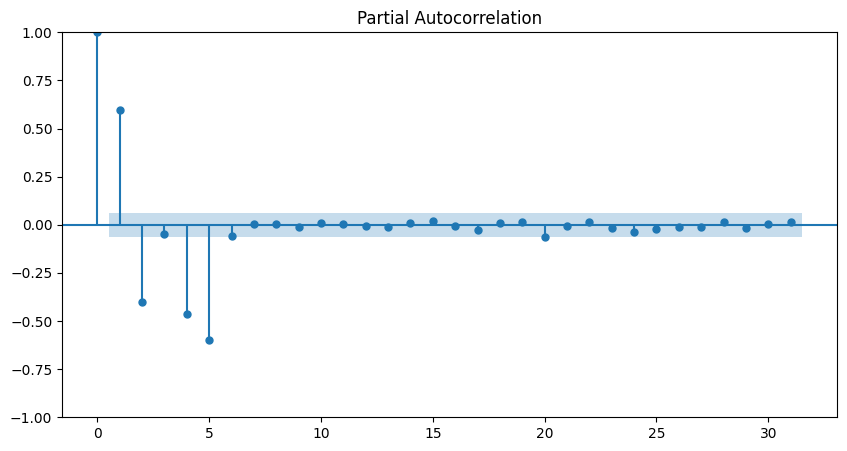

In [186]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x5, ax=ax);

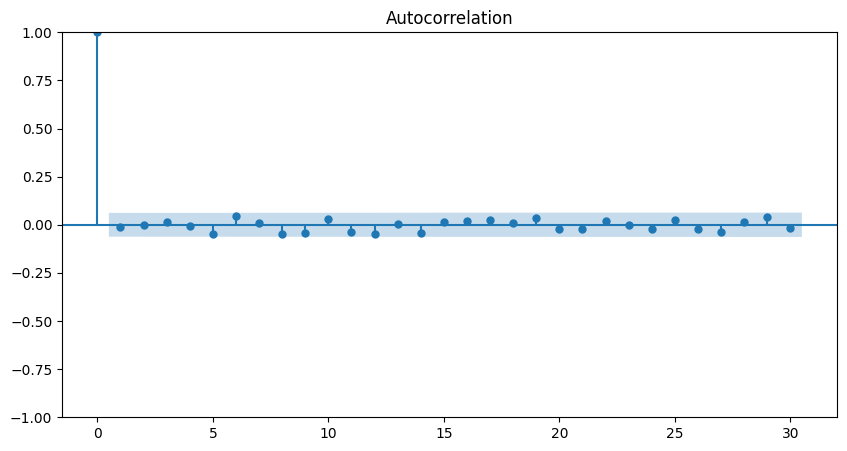

In [187]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(np.random.randn(1000), ax=ax);

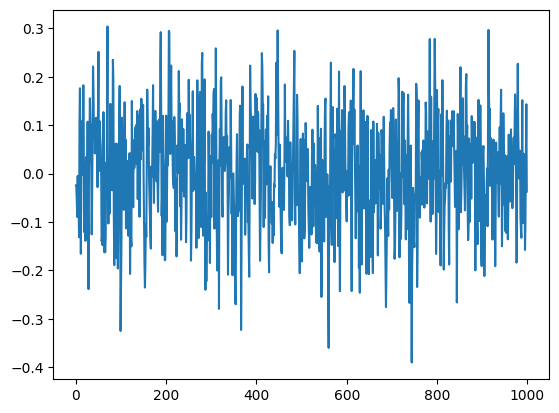

In [188]:
errors = 0.1 * np.random.randn(1000)
ma1 = []
for i in range(1000):
    if i >= 1:
        x = 0.5 * errors[i-1] + errors[i]
    else:
        x = errors[i]
    ma1.append(x)

ma1 = np.array(ma1)
plt.plot(ma1);

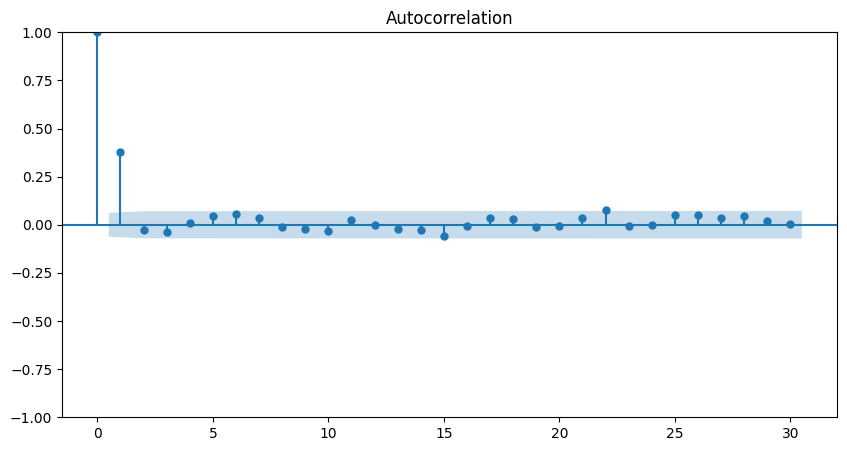

In [189]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma1, ax=ax);

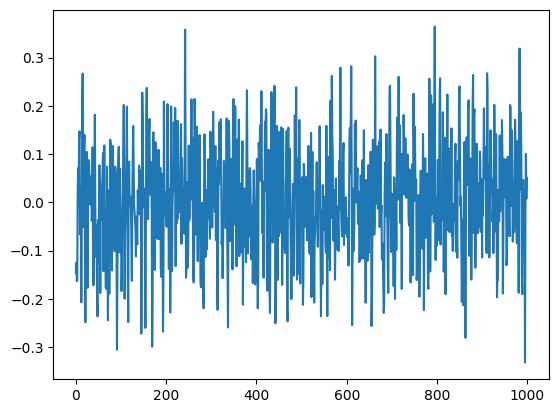

In [190]:
errors = 0.1 * np.random.randn(1000)
ma2 = []
for i in range(1000):
    x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + errors[i]
    ma2.append(x)
ma2 = np.array(ma2)
plt.plot(ma2);

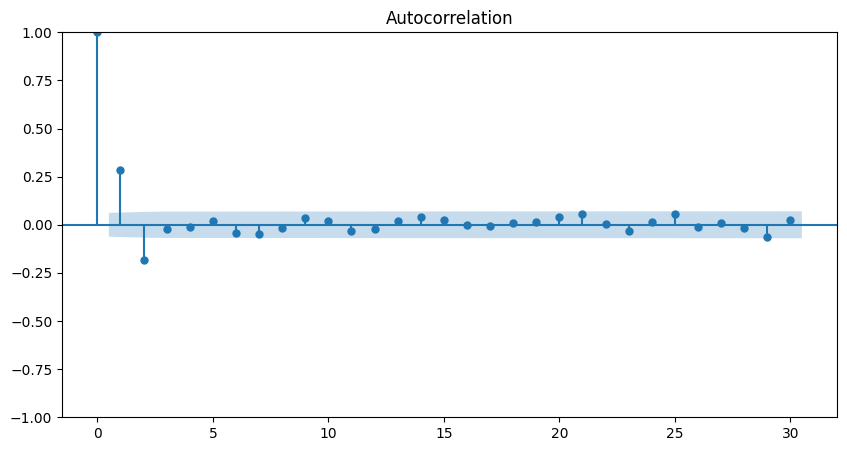

In [191]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma2, ax=ax);

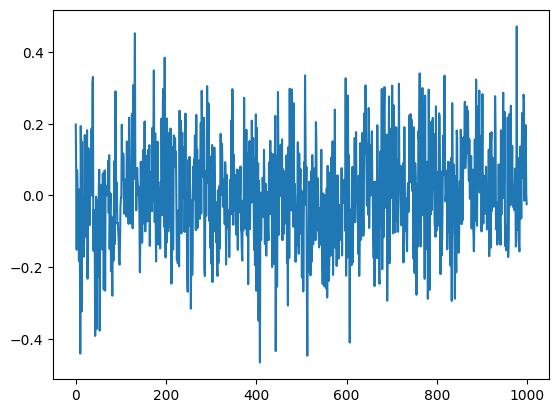

In [192]:
errors = 0.1 * np.random.randn(1000)
ma3 = []
for i in range(1000):
    x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + 0.7 * errors[i-3] + errors[i]
    ma3.append(x)
ma3 = np.array(ma3)
plt.plot(ma3);

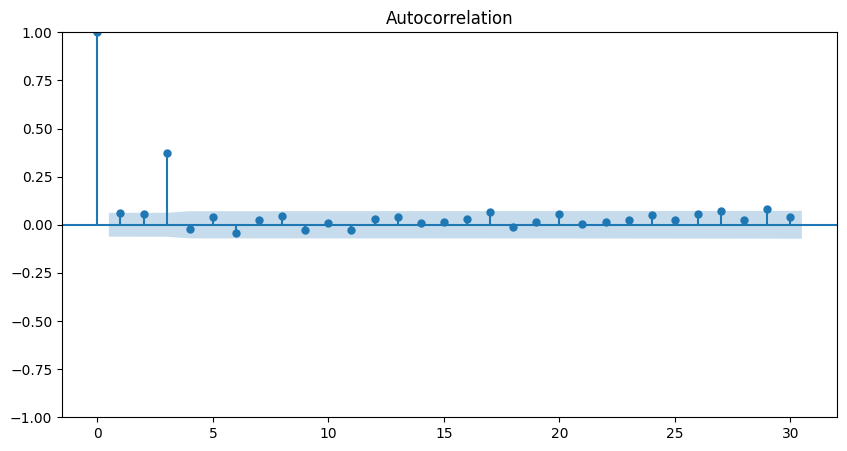

In [193]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma3, ax=ax);

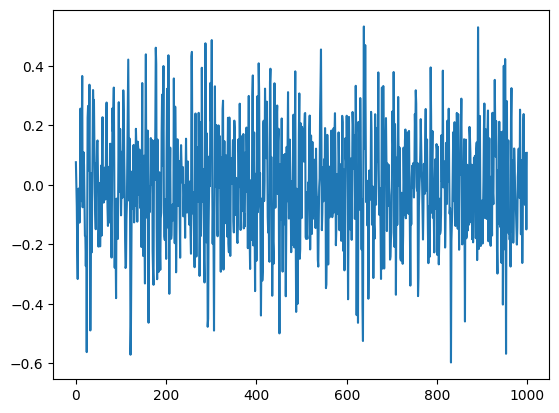

In [194]:
errors = 0.1 * np.random.randn(1000)
ma6 = []
for i in range(1000):
    x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + 0.7 * errors[i-3] \
        + 0.2 * errors[i-4] - 0.8 * errors[i-5] - 0.9 * errors[i-6] + errors[i]
    ma6.append(x)
ma6 = np.array(ma6)
plt.plot(ma6);

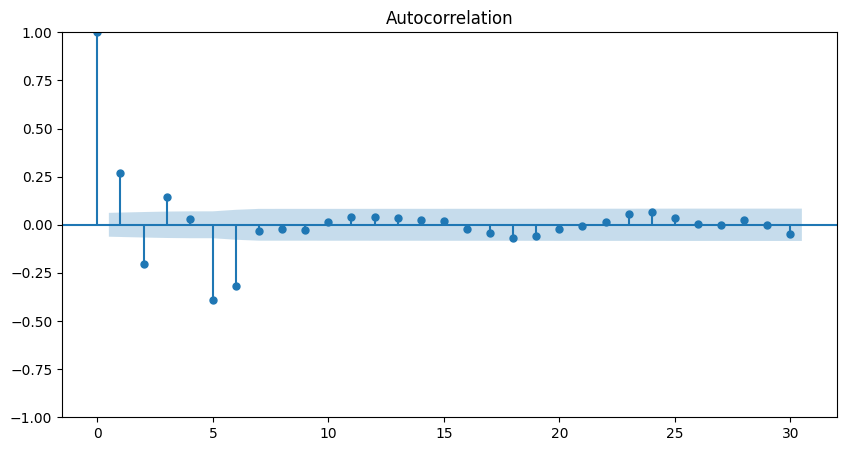

In [195]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma6, ax=ax);

## Auto ARIMA

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [197]:
data = pd.read_csv("raw_data/airline_passengers.csv", index_col="Month", parse_dates=True)

In [198]:
data["LogPassengers"] = np.log(data["Passengers"])

In [199]:
Ntest = 12
train = data.iloc[:-Ntest]
test = data.iloc[-Ntest:]

In [200]:
import pmdarima as pm

In [201]:
model = pm.auto_arima(train["Passengers"],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.18 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.27 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.59 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.21 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.15 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.28 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.08 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.72 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [202]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Sat, 01 Jun 2024   AIC                            905.686
Time:                                    16:48:36   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [203]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

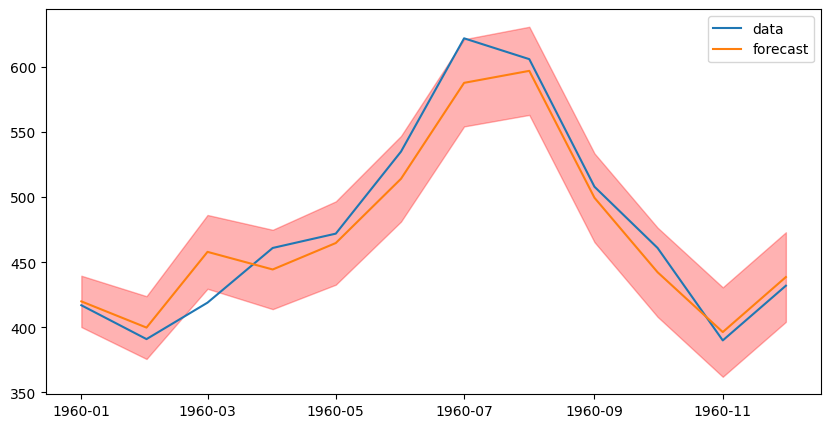

In [204]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test["Passengers"], label="data")
ax.plot(test.index, test_pred, label="forecast")
ax.fill_between(test.index, confint[:, 0], confint[:, 1],
                color = "red", alpha=0.3)
ax.legend();

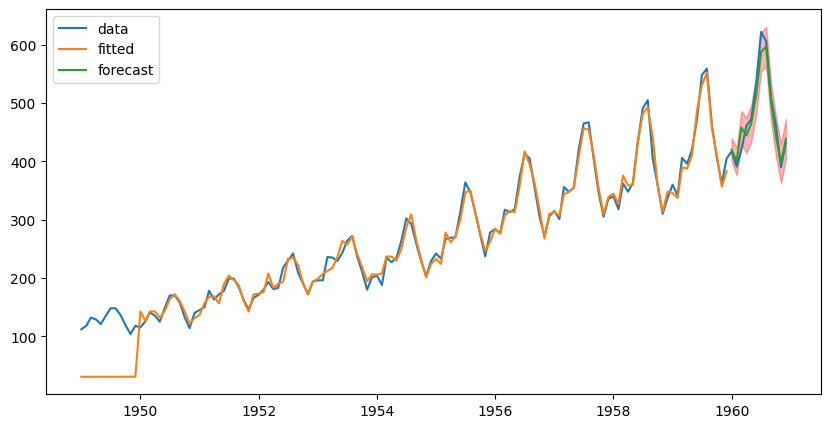

In [205]:
train_pred = model.predict_in_sample(start=0, end=-1)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data.index, data["Passengers"], label="data")
ax.plot(train.index, train_pred, label="fitted")
ax.plot(test.index, test_pred, label="forecast")
ax.fill_between(test.index, confint[:, 0], confint[:, 1],
                color = "red", alpha=0.3)
ax.legend();

In [206]:
logmodel = pm.auto_arima(train["LogPassengers"],
                         trace=True,
                         suppress_warning=True,
                         seasonal=True, m=12)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-438.254, Time=1.30 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=1.09 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=1.08 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=2.87 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.782, Time=0.94 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.330, Time=2.77 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.680, Time=0.82 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.574, Time=1.00 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.23 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-443.273, Time=1.01 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.344, Time=6.73 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [207]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Sat, 01 Jun 2024   AIC                           -448.052
Time:                                      16:49:27   BIC                           -434.114
Sample:                                  01-01-1949   HQIC                          -442.392
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0192      0.009      2.150      0.032       0.002       0.037
ar.L1          0.6007      0.083      7.280      0.000       0.439       0.762
ar.L2          0.2417      0.085      2.854      0.004       0.076       0.408
ma.S.L12      -0.5670      0.105     -5.418      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.193      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.06
Prob(Q):                              0.99   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

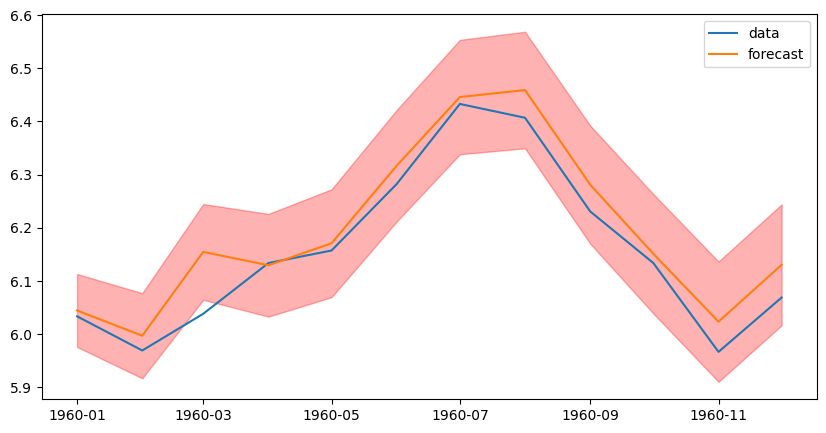

In [208]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test["LogPassengers"], label="data")
ax.plot(test.index, test_pred_log, label="forecast")
ax.fill_between(test.index, confint[:, 0], confint[:, 1],
                color = "red", alpha=0.3)
ax.legend();

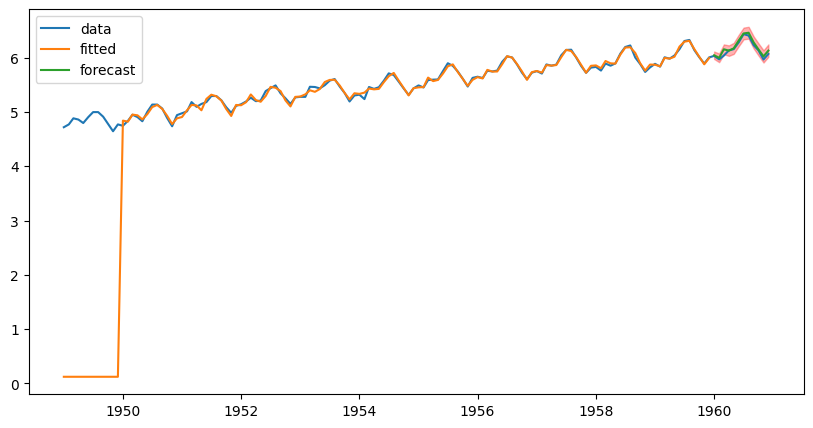

In [210]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data.index, data["LogPassengers"], label="data")
ax.plot(train.index, train_pred_log, label="fitted")
ax.plot(test.index, test_pred_log, label="forecast")
ax.fill_between(test.index, confint[:, 0], confint[:, 1],
                color = "red", alpha=0.3)
ax.legend();

In [211]:
def rmse(t, y):
    return np.sqrt(np.mean((t-y)**2))

In [213]:
print("Non-logged RMSE:", rmse(test["Passengers"], test_pred))
print("Logged RMSE:", rmse(test["Passengers"], np.exp(test_pred_log)))

Non-logged RMSE: 18.536469014046745
Logged RMSE: 23.03129977633835


In [224]:
model = pm.auto_arima(train["LogPassengers"],
                      trace=True,
                      suppress_warnings=True,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-216.024, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.402, Time=0.33 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-229.057, Time=0.33 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.76 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-251.365, Time=0.54 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept  

In [225]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 1)   Log Likelihood                 227.178
Date:                Sat, 01 Jun 2024   AIC                           -424.357
Time:                        16:58:09   BIC                           -381.229
Sample:                    01-01-1949   HQIC                          -406.832
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0078      0.006      1.296      0.195      -0.004       0.020
ar.L1          0.0229      0.094      0.244      0.807      -0.161       0.207
ar.L2         -0.0836      0.070     -1.198      0.231      -0.220       0.053
ar.L3         -0.0444      0.068     -0.648      0.517      -0.179       0.090
ar.L4         -0.1207      0.074     -1.628      0.104      -0.266       0.025
ar.L5          0.0048      0.068      0.070      0.944      -0.128       0.138
ar.L6         -0.0711      0.068     -1.050      0.294      -0.204       0.062
ar.L7         -0.0556      0.074     -0.747      0.455      -0.201       0.090
ar.L8         -0.1240      0.068     -1.824      0.068      -0.257       0.009
ar.L9          0.0004      0.081      0.005      0.996      -0.158       0.159
ar.L10        -0.0935      0.067     -1.398      0.162      -0.225       0.038
ar.L11         0.0107      0.074      0.145      0.885      -0.134       0.156
ar.L12         0.7712      0.064     11.960      0.000       0.645       0.898
ma.L1         -0.3638      0.131     -2.780      0.005      -0.620      -0.107
sigma2         0.0016      0.000      7.026      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.29
Prob(Q):                              0.94   Prob(JB):                         0.32
Heteroskedasticity (H):               0.37   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

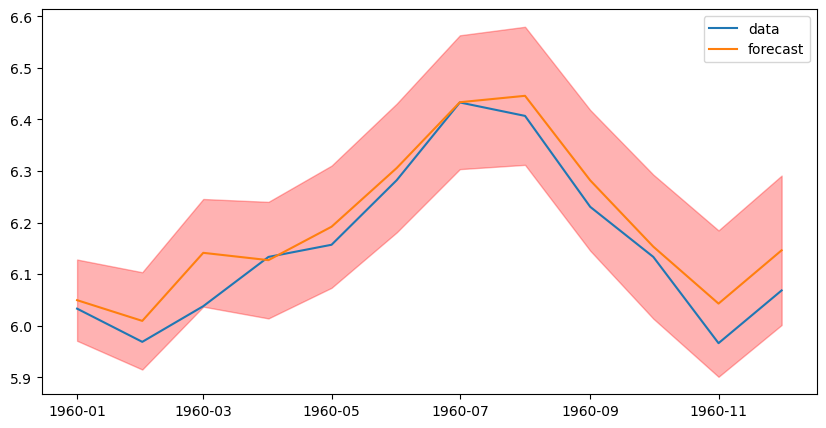

In [226]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test["LogPassengers"], label="data")
ax.plot(test.index, test_pred, label="forecast")
ax.fill_between(test.index, confint[:, 0], confint[:, 1],
                color = "red", alpha=0.3)
ax.legend();

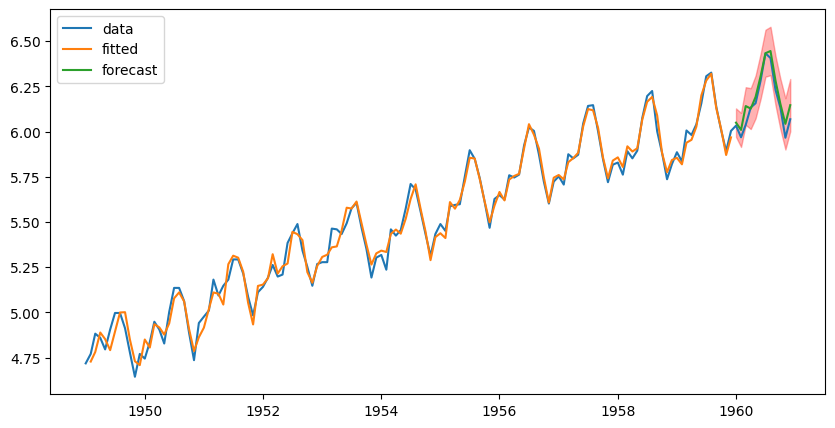

In [227]:
train_pred = model.predict_in_sample(start=1, end=-1)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data.index, data["LogPassengers"], label="data")
ax.plot(train.index[1:], train_pred, label="fitted")
ax.plot(test.index, test_pred, label="forecast")
ax.fill_between(test.index, confint[:, 0], confint[:, 1],
                color = "red", alpha=0.3)
ax.legend();

In [228]:
rmse(test["Passengers"], np.exp(test_pred))

23.136442948676134

## AUTO ARIMA STOCK PRICES

In [1]:
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("raw_data/sp500sub.csv", index_col="Date", parse_dates=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


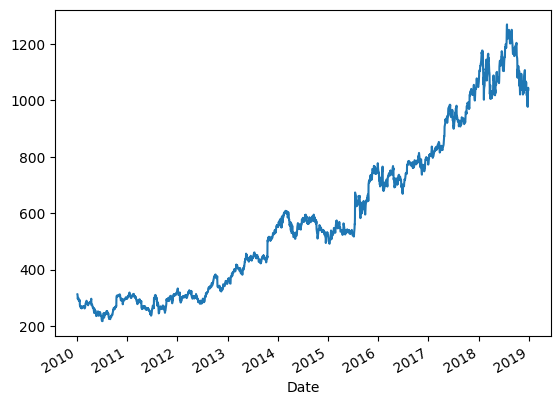

In [3]:
goog = data[data["Name"] == "GOOG"]["Close"]
goog.plot();

In [4]:
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [5]:
model = pm.auto_arima(train,
                      error_action="ignore",
                      trace=True,
                      suppress_warnings=True,
                      maxiter=10,
                      seasonal=False)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16270.771, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16268.077, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.935, Time=0.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16268.277, Time=0.48 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.45 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16264.983, Time=0.33 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=16266.925, Time=0.41 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16268.907, Time=0.61 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=16265.470, Time=0.12 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 4.870 seconds


In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8127.491
Date:                Mon, 03 Jun 2024   AIC                          16264.983
Time:                        21:12:32   BIC                          16293.536
Sample:                             0   HQIC                         16275.409
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3104      0.198      1.571      0.116      -0.077       0.698
ar.L1          0.0378      0.012      3.152      0.002       0.014       0.061
ar.L2         -0.0410      0.013     -3.241      0.001      -0.066      -0.016
ar.L3          0.0488      0.012      4.031      0.000       0.025       0.073
sigma2        85.1623      1.033     82.421      0.000      83.137      87.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11790.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.78   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (3, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [11]:
def plot_result(model, fulldata, train, test):
    params = model.get_params()
    d = params["order"][1]

    train_pred = model.predict_in_sample(start=d, end=-1)
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(fulldata.index, fulldata, label="Data")
    ax.plot(train.index[d:], train_pred, label="fitted")
    ax.plot(test.index, test_pred, label="forecast")
    ax.fill_between(test.index, confint[:, 0], confint[:, 1], color="red", alpha=0.3)
    ax.legend();

c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


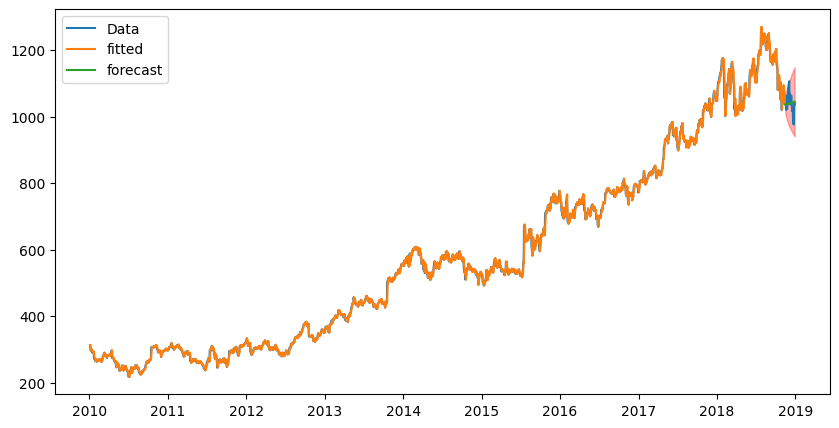

In [12]:
plot_result(model, goog, train, test)

In [14]:
def plot_test(model, test):
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(test.index, test, label="True")
    ax.plot(test.index, test_pred, label="forecast")
    ax.fill_between(test.index, confint[:, 0], confint[:, 1], color="red", alpha=0.3)
    ax.legend()

c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


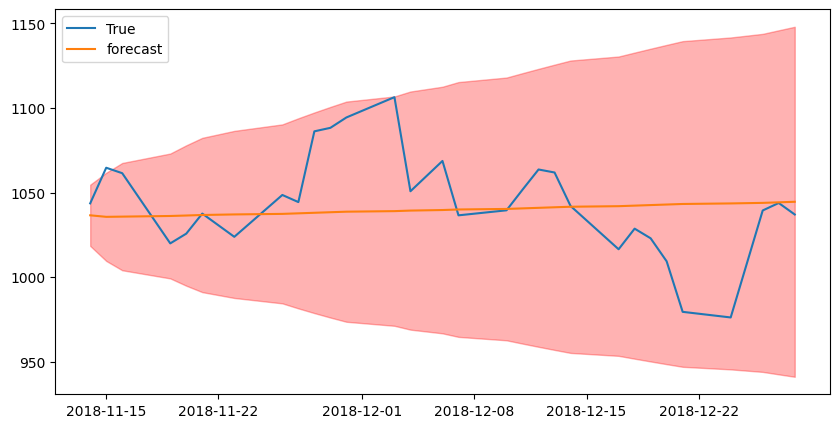

In [15]:
plot_test(model, test)

In [24]:
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))

print("RMSE ARIMA:", rmse(model.predict(n_periods=Ntest).values, test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 30.436602011716605
RMSE Naive: 30.029502477261467


c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


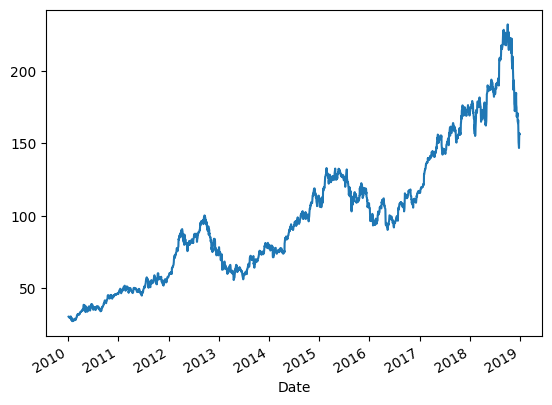

In [25]:
aapl = data[data["Name"]=="AAPL"]["Close"]
aapl.plot();

In [27]:
train = aapl.iloc[:-Ntest]
test = aapl.iloc[-Ntest:]
model = pm.auto_arima(train,
                      error_action="ignore",
                      tracce=True,
                      suppress_warnings=True,
                      maxiter=10,
                      seasonal=False)

In [28]:
 model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4279.148
Date:                Mon, 03 Jun 2024   AIC                           8570.296
Time:                        21:31:57   BIC                           8604.560
Sample:                             0   HQIC                          8582.808
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0803      0.042      1.896      0.058      -0.003       0.163
ar.L1          0.3755      0.165      2.279      0.023       0.053       0.699
ar.L2         -0.4239      0.176     -2.407      0.016      -0.769      -0.079
ma.L1         -0.3433      0.172     -2.002      0.045      -0.679      -0.007
ma.L2          0.3579      0.183      1.958      0.050      -0.000       0.716
sigma2         2.7182      0.039     69.453      0.000       2.642       2.795
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6223.04
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


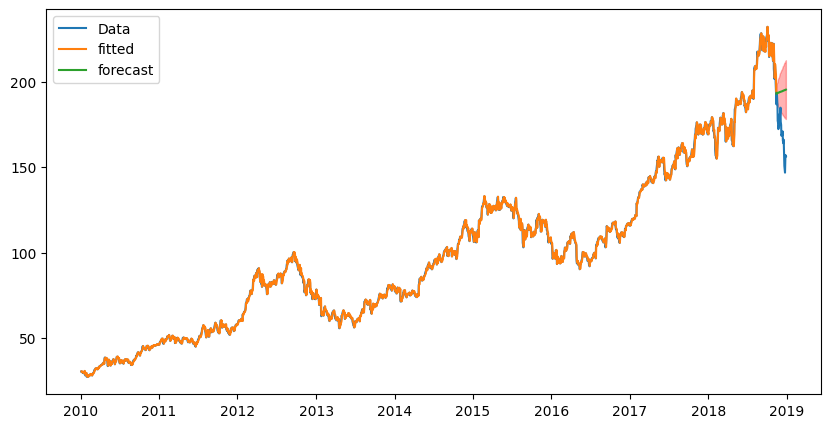

In [29]:
plot_result(model, aapl, train, test)

c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


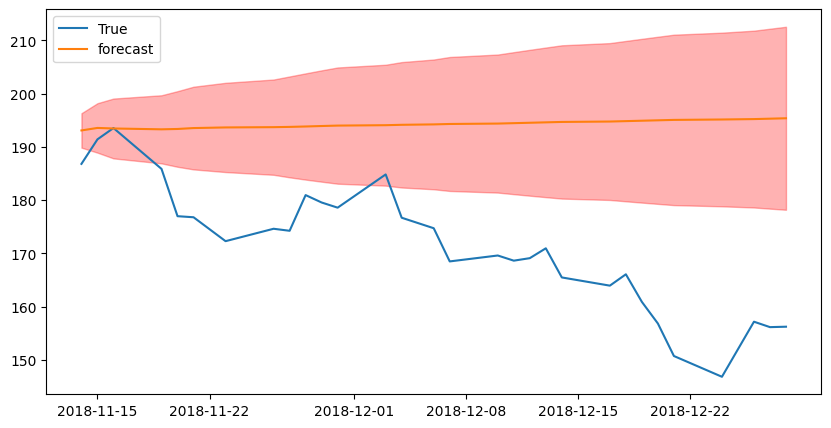

In [30]:
plot_test(model, test)

In [31]:
print("RMSE ARIMA:", rmse(model.predict(n_periods=Ntest).values, test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 26.094960080652257
RMSE Naive: 24.02712058667382


c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


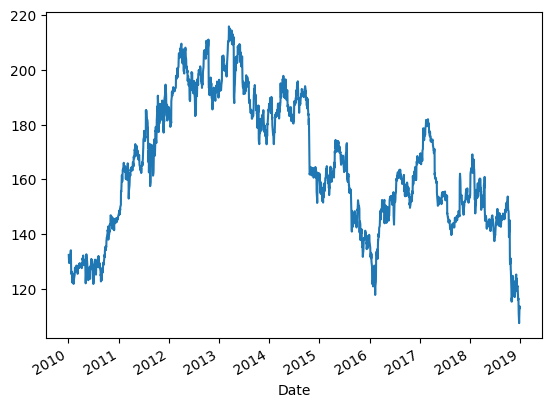

In [32]:
ibm = data[data["Name"] == "IBM"]["Close"]
ibm.plot();

In [33]:
train = ibm.iloc[:-Ntest]
test = ibm.iloc[-Ntest:]


In [34]:
model = pm.auto_arima(train,
                      error_action="ignore",
                      suppress_warnings=True,
                      trace=True,
                      maxiter=10,
                      seasonal=False)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9442.954, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9436.082, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9437.603, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9437.589, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9434.097, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9439.637, Time=0.33 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.362 seconds


In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4716.049
Date:                Mon, 03 Jun 2024   AIC                           9434.097
Time:                        21:35:39   BIC                           9439.808
Sample:                             0   HQIC                          9436.183
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.0067      0.055     72.559      0.000       3.898       4.115
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):              5352.76
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.77
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


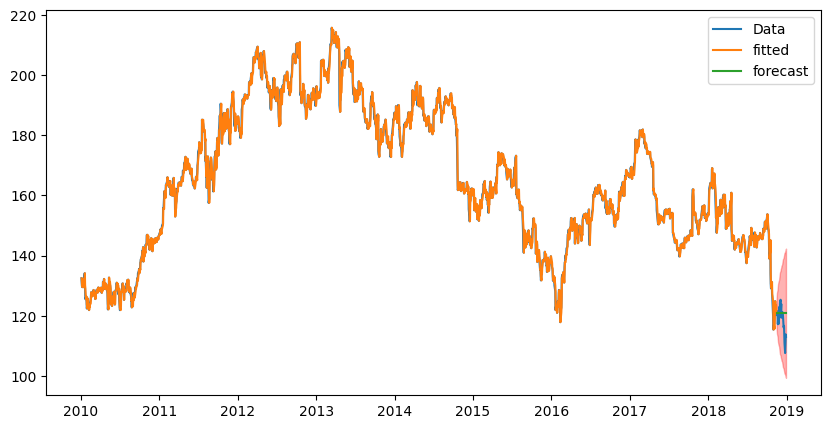

In [36]:
plot_result(model, ibm, train, test)

c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


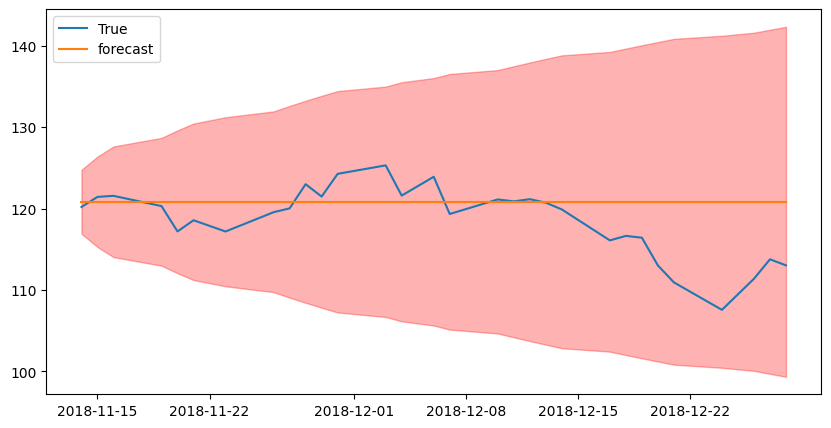

In [38]:
plot_test(model, test)

In [39]:
print("RMSE ARIMA:", rmse(model.predict(n_periods=Ntest).values, test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 4.763157130051095
RMSE Naive: 4.763157130051095


c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [40]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [42]:
def log_ret(price):
    log_price = np.log(price)
    return log_price.diff()
goog = data[data["Name"]=="GOOG"][["Close"]].copy()

In [43]:
goog["LogRet"] = log_ret(goog["Close"])
goog.head()

,Close,LogRet
Date,,
2010-01-04,312.204773,NaN
2010-01-05,310.829926,-0.004413
2010-01-06,302.994293,-0.025532
2010-01-07,295.940735,-0.023555
2010-01-08,299.885956,0.013243


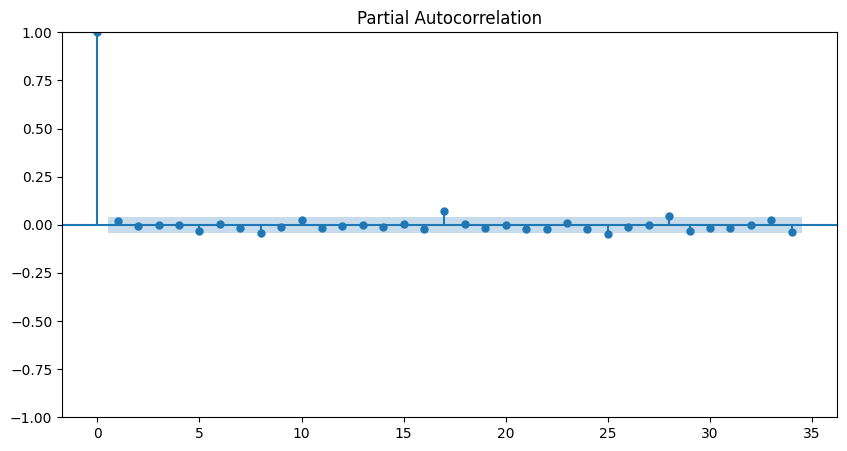

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(goog["LogRet"].dropna(), ax=ax);

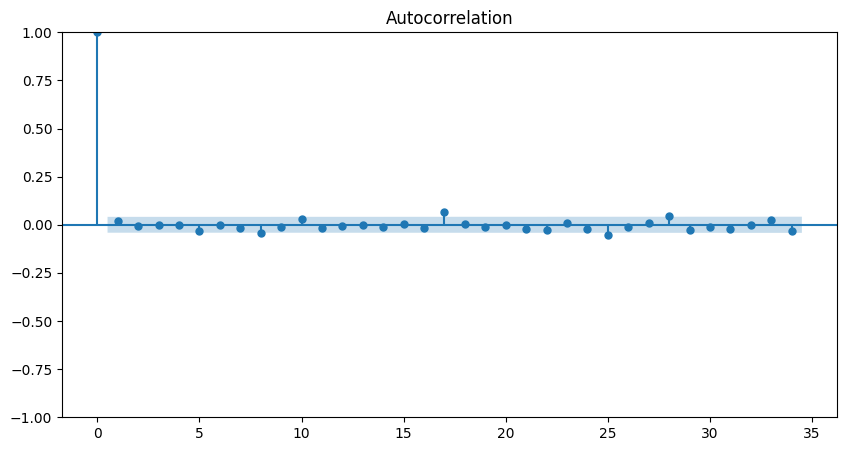

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(goog["LogRet"].dropna(), ax=ax);

In [47]:
aapl = data[data["Name"]=="AAPL"][["Close"]].copy()

In [48]:
aapl["LogRet"] = log_ret(aapl["Close"])

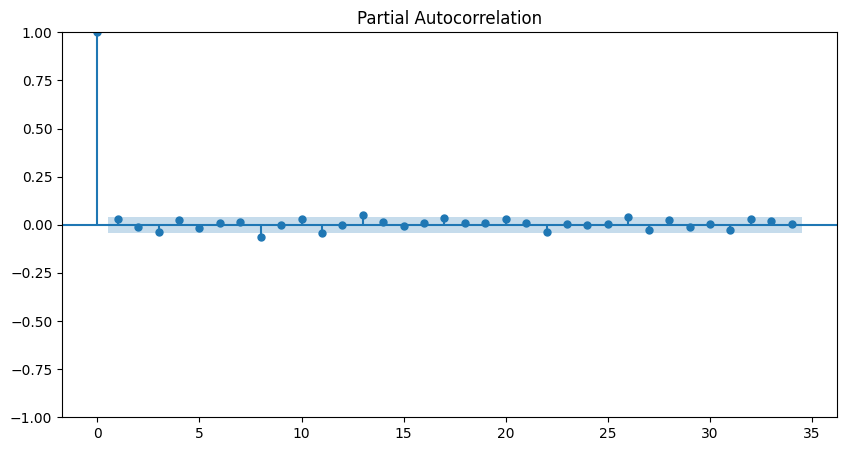

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(aapl["LogRet"].dropna(), ax=ax);

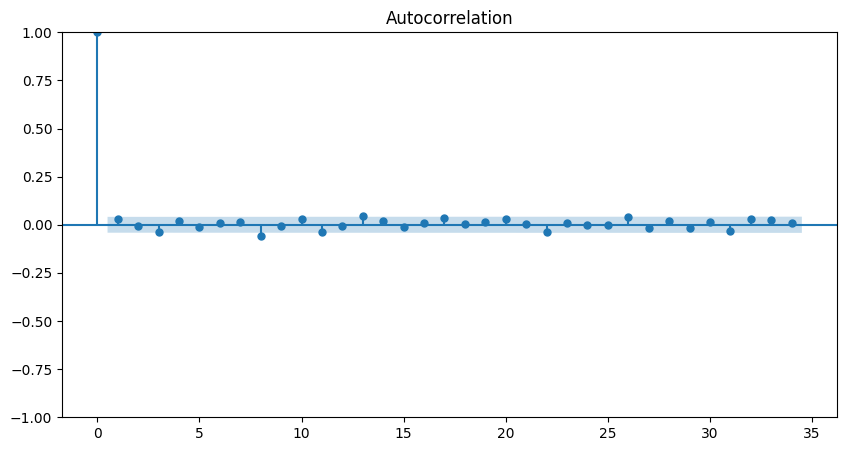

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(aapl["LogRet"].dropna(), ax=ax);